In [47]:
import pandas as pd

data = pd.read_csv('fm_엑셀확인용.csv')

# csv 파일 컬럼 값에 Top 10 Keyword 문자열이 포함되어 있는지 확인

data_including_keywords = data['제목'].str.contains("간부", na=False)
data_including_keywords = data['본문'].str.contains("간부", na=False)
data_including_keywords = data['댓글'].str.contains("간부", na=False)

subset_df = data[data_including_keywords]

# 결과 출력
print(subset_df.shape)
print()

subset_df

# df = pd.DataFrame(subset_df) 
# df.to_csv('FM_키워드포함.csv', index = False, encoding="utf-8-sig")

(1, 3)



,제목,본문,댓글
8,충격 응급수술 필요한 병사 코로나 핑계로 끝까지 휴가 안보내줘 지체 장애인 만든 군...,출처 요약 기갑여단 박격포 장갑차 조종수로 복무하던 글쓴이 고된 훈련과 군 복무로 ...,좆병신련들 진짜 살인 마렵다 왤캐 군대는 쓰레기들만 꼬이는 거임자기 복무랑 진급에 ...


In [48]:
import json
import csv
import nltk
import re
import sys
import pandas as pd
import numpy as np
from konlpy.tag import Komoran
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from nltk import Text
from collections import Counter
from collections import defaultdict
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

data = pd.read_csv('FM_키워드포함.csv')

#데이터 정제
data['제목'] = data['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data['본문'] = data['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data['댓글'] = data['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data['제목'] = data['제목'].str.replace('^ +', "") # 공백은 empty 값으로 변경
data['본문'] = data['본문'].str.replace('^ +', "") 
data['댓글'] = data['댓글'].str.replace('^ +', "") 
data['제목'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
data['본문'].replace('', np.nan, inplace=True) 
data['댓글'].replace('', np.nan, inplace=True)
data = data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플 개수 :',len(data))

data.values
values = "".join(str(i) for i in data.values)

#print(values)

#데이터 토큰화
fm_data = []
okt = Okt()
fm_morphs = okt.morphs(values, stem = True)
fm_morphs = [fm_morphs for fm_morphs in fm_morphs if len(fm_morphs) >= 2]

#불용어 처리
bool_words = ['태그', '지원', '으로', '시키다', '브라우저', '새끼', '이랑', '사람', '생각', '정도', '얼굴', '섹스', '진짜', '하는', '그냥', '같은', '있는', '이런', '근데', '하고']
for word in fm_morphs:
    if word in bool_words:
        while word in fm_morphs: 
            fm_morphs.remove(word)
fm_data = fm_morphs
#print(fm_morphs)

#감성 사전 읽어오기
table = dict()

with open('polarity.csv', 'r', -1, encoding = 'cp949') as polarity:
    next(polarity)
    
    for line in csv.reader(polarity):
        key = str()
        for word in line[0].split(';'):
            key+=word.split('/')[0]
        table[key] = {'Neg': line[3], 'Neut':line[4], 'Pos':line[6]}

columns = ['부정', '중립', '긍정']
df=pd.DataFrame(columns=columns)
df

#감성 분석 진행
def setiment_analysis(start, end):
    
    negative_list = []
    neutral_list = []
    positive_list = []
    
    negative = 0
    neutral = 0
    positive = 0
    
    for word in fm_data:
        if word in table:
            negative += float(table[word]['Neg'])
            neutral += float(table[word]['Neut'])
            positive += float(table[word]['Pos'])
            
    negative_list.append(negative)
    neutral_list.append(neutral)
    positive_list.append(positive)
    
    df['부정'] = negative_list
    df['중립'] = neutral_list
    df['긍정'] = positive_list
    
    #시각화
    ratio = [negative_list, neutral_list, positive_list]
    labels = ['negative', 'neutral', 'positive']
    plt.pie(ratio, labels=labels, autopct='%.2f%%')
    plt.show()
    

전처리 후 테스트용 샘플 개수 : 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


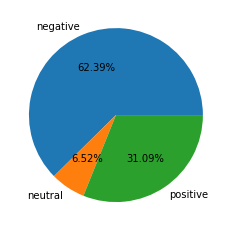

In [49]:
setiment_analysis(0,500)

In [50]:
df.to_csv('FM_sentiment_analysis.csv', index = False)
ds = pd.read_csv('FM_sentiment_analysis.csv')
ds

,부정,중립,긍정
0,244.099291,25.490231,121.650713
